In [1]:
from sympy import *

In [10]:
x, y, t = symbols('x y t')
a = Integral(cos(x)*exp(x),x)

In [6]:
a.doit()

exp(x)*sin(x)/2 + exp(x)*cos(x)/2

In [7]:
x+2*y

x + 2*y

In [11]:
y=Function('y')

In [12]:
dsolve(Eq(y(t).diff(t,t)-y(t),exp(t)))

Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))

In [19]:
x1 = symbols('\phi_{eff}^I')

In [20]:
x1

\phi_{eff}^I

In [21]:
type(x1)

sympy.core.symbol.Symbol

In [22]:
expr=x+1
x=2

In [23]:
type(x)

int

In [85]:
from qm.QuantumMachinesManager import QuantumMachinesManager
qmm = QuantumMachinesManager('3.15.166.181')

2021-08-09 16:33:33,694 - qm - INFO - Performing health check
2021-08-09 16:33:34,199 - qm - INFO - Health check passed
2021-08-09 16:33:34,358 - qm - WARNING - Client's version (0.90.1619) does not match the server version (0.90.974).


In [86]:
from qm.qua import *

2021-08-09 17:08:25,228 - qm - INFO - Flags: 
2021-08-09 17:08:25,229 - qm - INFO - Simulating Qua program


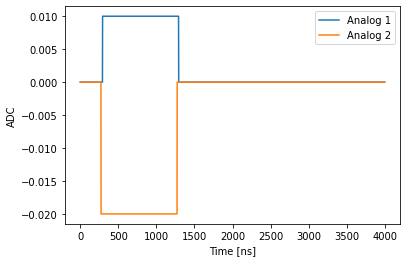

In [95]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig

config = {
    "version": 1,
    "controllers": {
        "con1": {
            "type": "opx1",
            "analog_outputs": {
                1: {"offset": +0.0},
                2: {"offset": +0.0},
            },
        }
    },
    "elements": {
        f"qe{i+1}": {
            "singleInput": {"port": ("con1", i+1)},
            "intermediate_frequency": 0,
            "operations": {
                "op": "constPulse",
            },
        }
    for i in range(2) },
    "pulses": {
        "constPulse": {
            "operation": "control",
            "length": 1000,  # in ns
            "waveforms": {"single": "const_wf"},
        },
    },
    "waveforms": {
        "const_wf": {"type": "constant", "sample": 0.2},
    },
}

example_matrix = [[0.9, 0.1], [0.8, -0.2]]

with program() as prog:
    
    a_out = declare(fixed, size=2)
    a_set = declare(fixed, value=[0.3, 0.5])
    n = declare(int)
    m = declare(int)
    
    for i in range(2):
        for j in range(2):
            assign(a_out[i], example_matrix[i][j] * a_set[j])

    for i in range(2):
        play("op" * amp(a_out[i]), f"qe{i+1}")

job = qmm.simulate(config, prog, SimulationConfig(1000))

samples = job.get_simulated_samples()
samples.con1.plot()


In [35]:
x=2

In [36]:
expr[0] is x

False

In [40]:
lambdify?

Signature:
lambdify(
    args: Iterable,
    expr,
    modules=None,
    printer=None,
    use_imps=True,
    dummify=False,
)
Docstring:
Convert a SymPy expression into a function that allows for fast
numeric evaluation.

.. warning::
   This function uses ``exec``, and thus shouldn't be used on
   unsanitized input.

.. versionchanged:: 1.7.0
   Passing a set for the *args* parameter is deprecated as sets are
   unordered. Use an ordered iterable such as a list or tuple.

Explanation

For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
equivalent NumPy function that numerically evaluates it:

>>> from sympy import sin, cos, symbols, lambdify
>>> import numpy as np
>>> x = symbols('x')
>>> expr = sin(x) + cos(x)
>>> expr
sin(x) + cos(x)
>>> f = lambdify(x, expr, 'numpy')
>>> a = np.array([1, 2])
>>> f(a)
[1.38177329 0.49315059]

The primary purpose of this function is to provide a bridge from SymPy
expressions to numerical libraries such as NumPy, SciPy, NumExpr, mp

In [50]:
x, y = symbols('x y')

In [45]:

import numpy as np
expr = sin(x)
a = np.linspace(0,1,100)
f = lambdify(x, expr)

In [47]:
simplify(sin(x)**2 + cos(x)**2)

1

In [53]:
diff(exp(x**2+y**2), x, y)

4*x*y*exp(x**2 + y**2)

In [54]:
type(exp(x**2+y**2))

exp

In [56]:
Derivative(exp(x**2+y**2), x, y)

Derivative(exp(x**2 + y**2), x, y)

In [57]:
oo

oo

In [60]:
x+x**2+O(x**3) + x**2

x + 2*x**2 + O(x**3)

In [68]:
simplify(exp(1j*pi/2)*exp(1j*pi/2))

-1

In [71]:
Matrix([x, y+1])Matrix([x, y+1])

ShapeError: Matrix size mismatch: (2, 1) * (2, 1).

In [72]:
?sympy.physics.paulialgebra

Object `sympy.physics.paulialgebra` not found.


In [74]:
import sympy.physics.paulialgebra as pa

In [80]:
s1=pa.Pauli(1)

In [82]:
from sympy.physics.matrices import msigma, te

In [83]:
msigma?

Signature: msigma(i)
Docstring:
Returns a Pauli matrix `\sigma_i` with ``i=1,2,3``.

References

.. [1] https://en.wikipedia.org/wiki/Pauli_matrices

Examples

>>> from sympy.physics.matrices import msigma
>>> msigma(1)
Matrix([
[0, 1],
[1, 0]])
File:      ~/miniconda3/lib/python3.9/site-packages/sympy/physics/matrices.py
Type:      function
